<a href="https://colab.research.google.com/github/Olasumboor/ml-train/blob/main/financial%20instrument%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf

In [ ]:
data = yf.download(tickers="^GSPC AAPL", start='1950-01-01', end="2022-02-07")

[*********************100%***********************]  2 of 2 completed


In [ ]:
df_price = data['Close']
df_price

Ticker,AAPL,^GSPC
Date,,
1950-01-03,NaN,16.660000
1950-01-04,NaN,16.850000
1950-01-05,NaN,16.930000
1950-01-06,NaN,16.980000
1950-01-09,NaN,17.080000
...,...,...
2022-01-31,171.774261,4515.549805
2022-02-01,171.607178,4546.540039
2022-02-02,172.816010,4589.379883


In [ ]:
df_price = df_price.dropna()
df_price

Ticker,AAPL,^GSPC
Date,,
1980-12-12,0.098726,129.229996
1980-12-15,0.093575,129.449997
1980-12-16,0.086707,130.600006
1980-12-17,0.088853,132.889999
1980-12-18,0.091429,133.000000
...,...,...
2022-01-31,171.774261,4515.549805
2022-02-01,171.607178,4546.540039
2022-02-02,172.816010,4589.379883


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class FinancialInstrument(object):
    def __init__(self, ser):
        self.__symbol = ser.name
        self.__df = pd.DataFrame()
        self.__df['Price'] = ser

    def calc_logret(self):
        self.__df['Log_ret'] = np.log(self.__df['Price'] / self.__df['Price'].shift(1))

    def get_quarter(self):
        self.__df['Quarter'] = self.__df.index.quarter

    def cal_logret_quarter(self):
        groups = self.__df.groupby('Quarter')
        self.__Log_ret_quarter = groups['Log_ret'].sum()

    def plot_hist(self):
        plt.figure(figsize=(10, 4))
        for quarter in range(1, 5):
            df_quarter = self.__df[self.__df['Quarter'] == quarter]
            plt.subplot(1, 4, quarter, xlim=[-.15, .15], title=self.__symbol + " Q" + str(quarter))
            df_quarter['Log_ret'].hist(bins=50)
        plt.show()

    def __repr__(self):
        return self.__symbol + "'s sum of log returns by quarter:\n" + self.__Log_ret_quarter.to_string()

In [ ]:
fin_insts = []
for symbol in df_price.columns:
    fin_insts.append(FinancialInstrument(df_price[symbol]))

In [ ]:
for fin_inst in fin_insts:
    fin_inst.calc_logret()
    fin_inst.get_quarter()
    fin_inst.cal_logret_quarter()

In [ ]:
for fin_inst in fin_insts:
    print(fin_inst._FinancialInstrument__df)

                 Price   Log_ret  Quarter
Date                                     
1980-12-12    0.098726       NaN        4
1980-12-15    0.093575 -0.053581        4
1980-12-16    0.086707 -0.076231        4
1980-12-17    0.088853  0.024450        4
1980-12-18    0.091429  0.028580        4
...                ...       ...      ...
2022-01-31  171.774261  0.025791        1
2022-02-01  171.607178 -0.000973        1
2022-02-02  172.816010  0.007019        1
2022-02-03  169.926575 -0.016861        1
2022-02-04  169.641220 -0.001681        1

[10376 rows x 3 columns]
                  Price   Log_ret  Quarter
Date                                      
1980-12-12   129.229996       NaN        4
1980-12-15   129.449997  0.001701        4
1980-12-16   130.600006  0.008845        4
1980-12-17   132.889999  0.017382        4
1980-12-18   133.000000  0.000827        4
...                 ...       ...      ...
2022-01-31  4515.549805  0.018710        1
2022-02-01  4546.540039  0.006840        

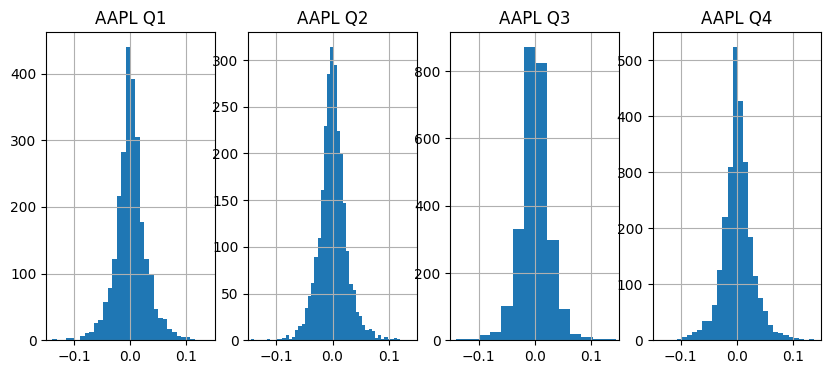

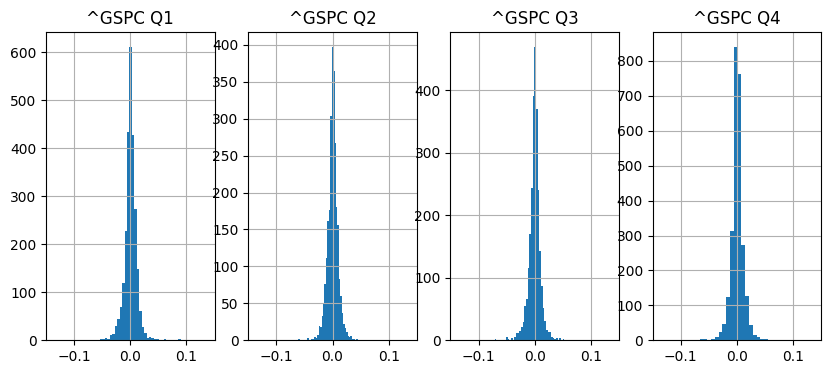

In [ ]:
for fin_inst in fin_insts:
    fin_inst.plot_hist()

In [ ]:
for fin_inst in fin_insts:
    print(fin_inst)

AAPL's sum of log returns by quarter:
Quarter
1    2.517305
2    0.782543
3    0.541459
4    3.607787
^GSPC's sum of log returns by quarter:
Quarter
1    0.751044
2    1.152199
3    0.004022
4    1.643092
